In [1]:
#importing required modules

import keras
import numpy as np
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.utils import normalize
from tensorflow.nn import relu,softmax
from keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
#spliting dataset into training data and testing data

(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

ytrain= to_categorical(ytrain)
ytest= to_categorical(ytest)

In [3]:
#scaling the pixel values between 0-1
xtrain = normalize(xtrain,axis=1)
xtest = normalize(xtest,axis=1)


In [4]:
#defining model and adding layers

model = Sequential()
model.add(Flatten())
model.add(Dense(128,activation=relu))
model.add(Dense(10,activation=softmax))

model.compile(optimizer='Adadelta',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

W0810 01:36:05.063632 16696 deprecation_wrapper.py:119] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 01:36:06.329416 16696 deprecation_wrapper.py:119] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [5]:
# training the model
history=model.fit(xtrain,ytrain,epochs=3)

W0810 01:36:08.024629 16696 deprecation_wrapper.py:119] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 01:36:08.079515 16696 deprecation_wrapper.py:119] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 01:36:08.141324 16696 deprecation_wrapper.py:119] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0810 01:36:08.598738 16696 deprecation.py:323] From c:\users\ravin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is 

Epoch 1/3
60000/60000 [==============================] - 7s 122us/step - loss: 0.3209 - acc: 0.9105
Epoch 2/3
60000/60000 [==============================] - 5s 81us/step - loss: 0.1700 - acc: 0.9506
Epoch 3/3
60000/60000 [==============================] - 5s 80us/step - loss: 0.1272 - acc: 0.9628


In [6]:
# calculating the accuracy and loss

loss,accuracy= model.evaluate(xtest,ytest) 
print("Loss :",loss)
print("Accuracy : ",accuracy)

10000/10000 [==============================] - 0s 32us/step
Loss : 0.12973509001508354
Accuracy :  0.9627


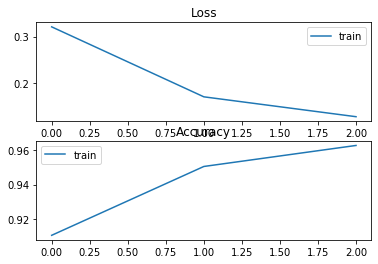

In [8]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.show()

In [9]:
#prediction

predict = model.predict([xtest])
print(np.argmax(predict[5]))

1


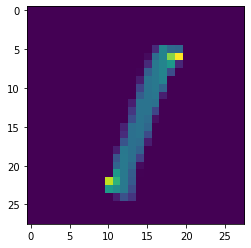

In [10]:
import matplotlib.pyplot as plt

plt.imshow(xtest[5])
plt.show()